# Regresión Lineal
La regresión lineal es un algoritmo supervisado que aprende a modelar una variable dependiente, $y$, como una función de algunas variables independientes (características), $x_i$, encontrando una línea que mejor se ajuste a los datos.

La ecuación de la regresión lineal es:
$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_px_p + \epsilon$

donde:

- $y$: la variable dependiente
- $x_i$: las variables independientes
- $\beta_i$: los coeficientes de los pesos. Son lo que el modelo aprende durante la optimización
- $\epsilon$: el error irreducible en el modelo. Un término que junta todas las partes de la data que no se modelaron

Entrenar un modelo de regresión lineal se trata de encontrar el conjunto de coeficientes que mejor modelan $y$ como una función de las variables independientes $x_i$. Los verdaderos parámetros del modelo nunca se conocen, sin embargo, se pueden estimar. Una vez que se estiman los coeficientes, el modelo puede predecir valores utilizando la siguiente ecuación:
$\hat{y} = \hat{\beta_0} + \hat{\beta_1}x_1 + \hat{\beta_2}x_2 + ... + \hat{\beta_p}x_p + \epsilon$

Entonces, predecir valores futuros (inferencia) es tan simple como conectar los valores de las características $x_i$ en la ecuación.

## Dataset
Este dataset es un conjunto de datos clásico en el mundo del machine learning. Esta información describe características de casas y sus precios.

Columnas:
- price: int
- area: int
- bedrooms: int
- bathrooms: int
- stories: int
- mainroad: str
- guestroom: str
- basement: str
- hotwaterheating: str
- airconditioning: str
- parking: int
- prefarea: str
- furnishingstatus: str

In [1]:
# Ignora los warnings de los paquetes
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Paquetes necesarios para ejecutar el proyecto
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
DATA = 'data/housing.csv'

In [4]:
# Lectura del archivo csv usando el paquete Python. 
# Los datos se guardan en un DataFrame de Pandas.
data = pd.read_csv(DATA)

In [5]:
# Todas las transformaciones que se hagan a los datos serán aplicadas a otro objeto 
# para así siempre tener acceso a los datos originales.
data_clean = data.copy()

In [6]:
# Preview de la información con el formato de DataFrame
data_clean.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
# El shape del DataFrame permite ver cuántos registros y cuántas columnas conforman el conjunto de datos
data_clean.shape

(545, 13)

In [8]:
# Este método permite ver las características de cada columna
# con la intención de conocer sus tipos de datos y si existen datos nulos o no.
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [9]:
# Estadística descriptiva de las columnas numéricas
data_clean.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## Tratamiento de missing values

In [10]:
# Método para obtener el porcentaje de missing values en el conjunto de datos
def get_missining_values_perfcentage(df: pd.DataFrame):
    col = 'missingPercentage'
    missing_df = (df.isnull().sum()/len(df)).rename_axis('columns').to_frame(col).reset_index()
    missing_df[col] = missing_df[col] * 100
    missing_df['type'] = missing_df['columns'].apply(
        lambda col: str(df[col].dtypes))
    return missing_df.sort_values(by=col, ascending=False)

In [11]:
get_missining_values_perfcentage(data_clean)

,columns,missingPercentage,type
0,price,0.0,int64
1,area,0.0,int64
2,bedrooms,0.0,int64
3,bathrooms,0.0,int64
4,stories,0.0,int64
5,mainroad,0.0,object
6,guestroom,0.0,object
7,basement,0.0,object
8,hotwaterheating,0.0,object
9,airconditioning,0.0,object


## Análisis de outliers

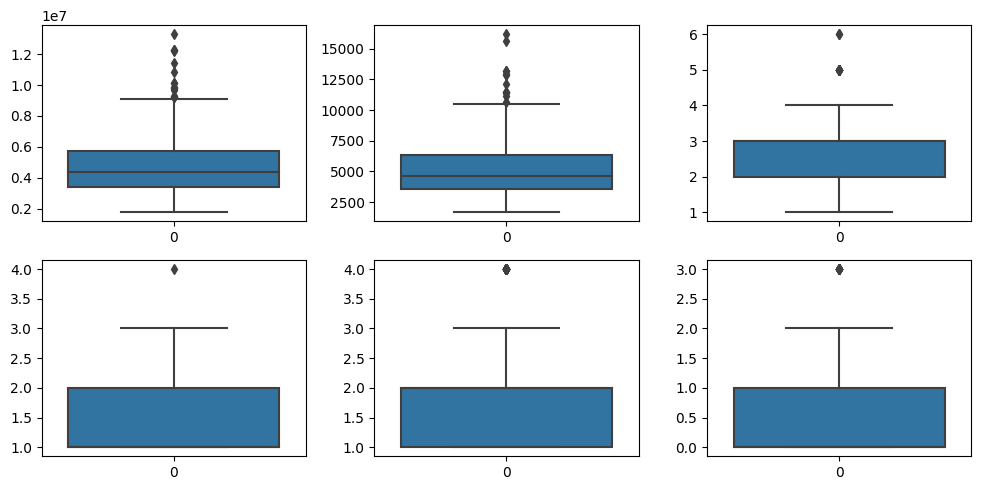

In [12]:
# Gráficos boxplot para encontrar outliers
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(data_clean['price'], ax = axs[0,0])
plt2 = sns.boxplot(data_clean['area'], ax = axs[0,1])
plt3 = sns.boxplot(data_clean['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(data_clean['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(data_clean['stories'], ax = axs[1,1])
plt3 = sns.boxplot(data_clean['parking'], ax = axs[1,2])

plt.tight_layout()

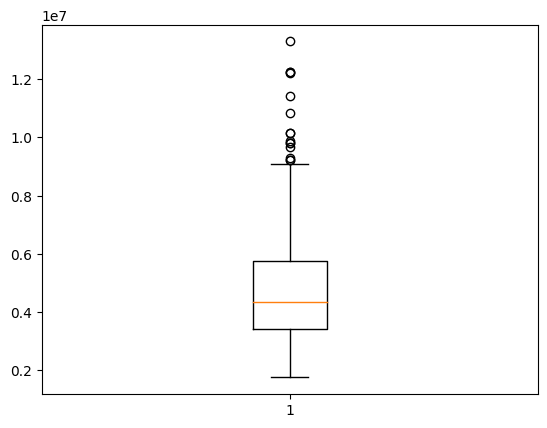

In [13]:
# Tratamiento de outliers para la variable price
plt.boxplot(data_clean['price'])
Q1 = data_clean['price'].quantile(0.25)
Q3 = data_clean['price'].quantile(0.75)
IQR = Q3 - Q1
data_clean = data_clean[(data_clean['price'] >= Q1 - 1.5*IQR) & (data_clean['price'] <= Q3 + 1.5*IQR)]

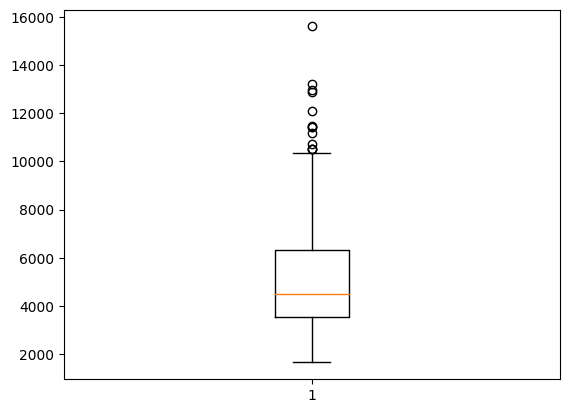

In [14]:
# Tratamiento de outliers para la variable area
plt.boxplot(data_clean['area'])
Q1 = data_clean['area'].quantile(0.25)
Q3 = data_clean['area'].quantile(0.75)
IQR = Q3 - Q1
data_clean = data_clean[(data_clean['area'] >= Q1 - 1.5*IQR) & (data_clean['area'] <= Q3 + 1.5*IQR)]

## Correlación de variables

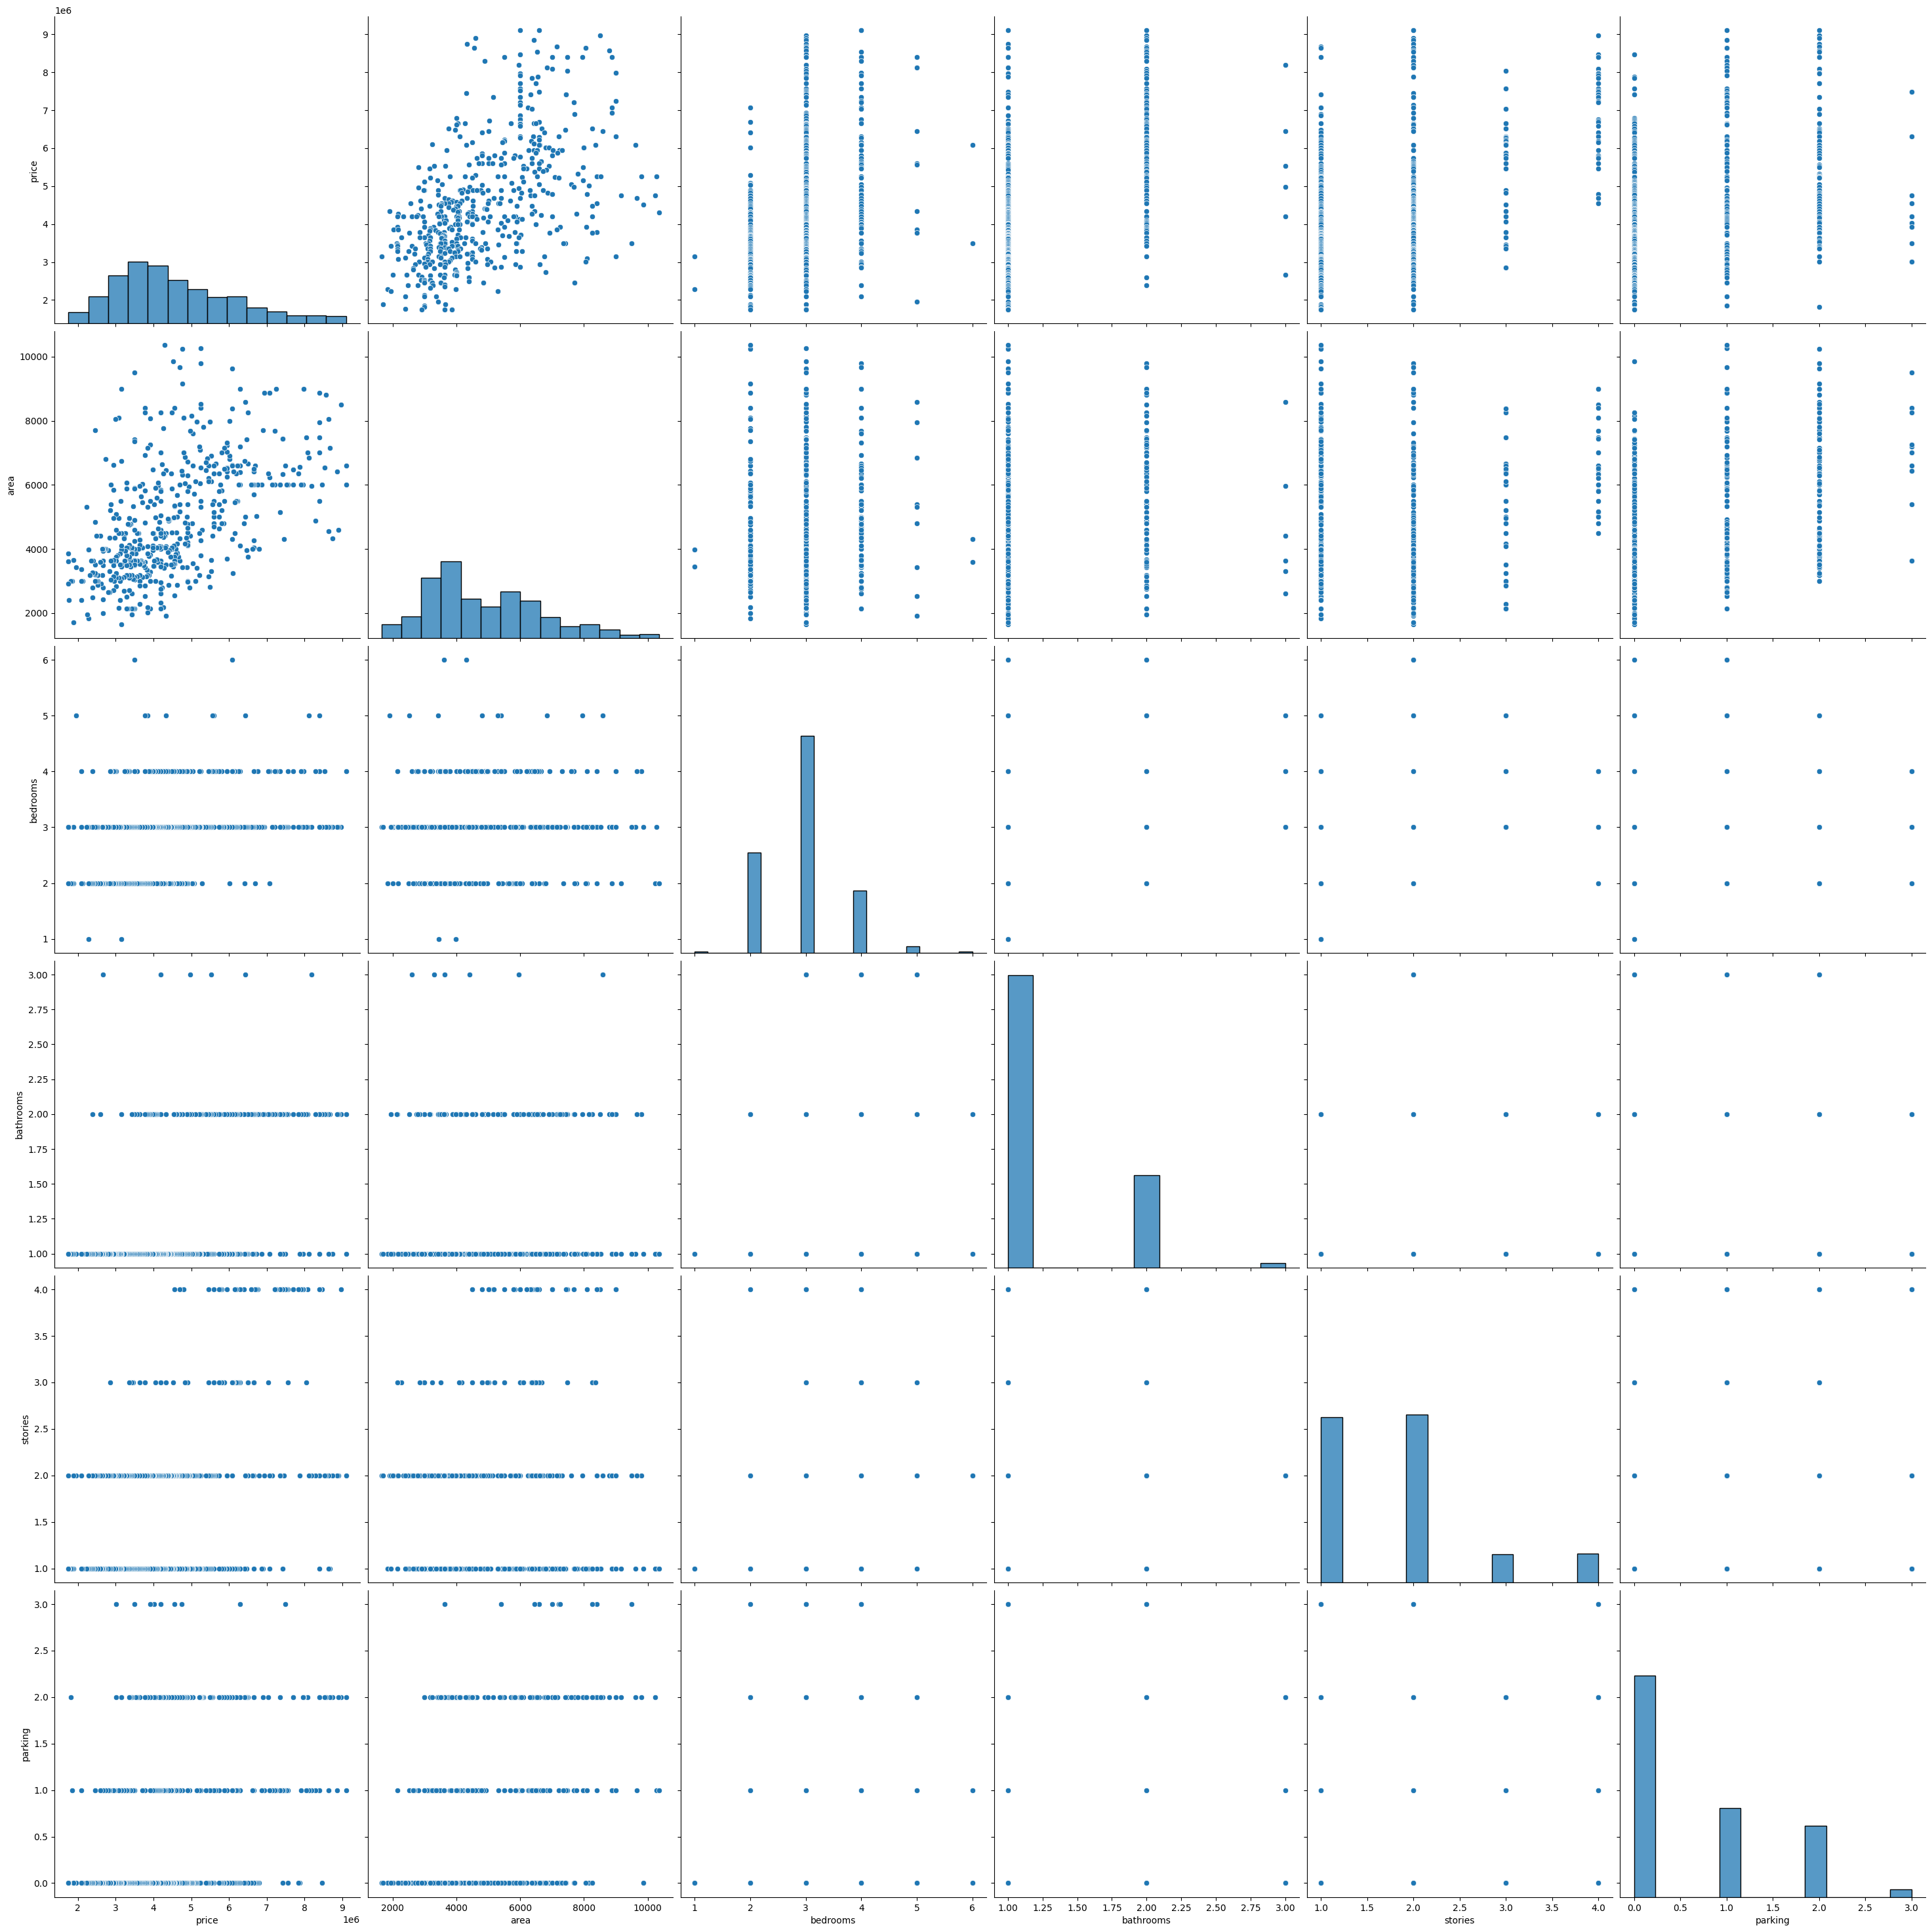

In [15]:
# Gráfica de correlación de variables
sns.pairplot(data=data_clean, height=5, diag_kind='hist')

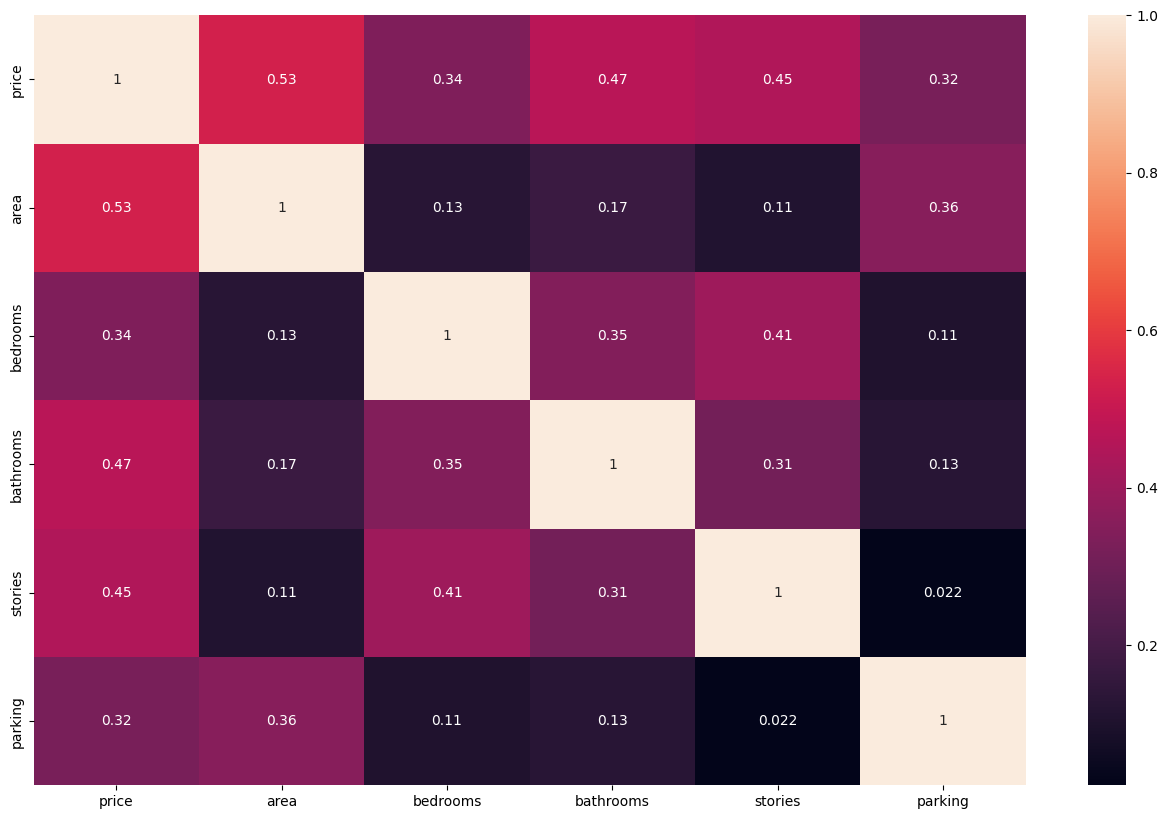

In [17]:
# Mapa de calor de la correlación de las variables numéricas
plt.figure(figsize = (16, 10))
sns.heatmap(data_clean.corr(), annot = True)
plt.show()

## Encoding de variables

In [ ]:
# Lista de variables a transformar
cols =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

In [ ]:
# Método para mapear las variables
def var_encode(x):
    return x.map({'yes': 1, "no": 0})

In [18]:
data_clean[cols] = data_clean[cols].apply(var_encode)

In [20]:
# One hot encoding
status = pd.get_dummies(data_clean['furnishingstatus'], drop_first = True)

In [21]:
data_clean = pd.concat([data_clean, status], axis = 1)

In [22]:
data_clean.drop(['furnishingstatus'], axis = 1, inplace = True)

## Modelado

In [23]:
# Separación de variables independientes y variable dependiente
X = data_clean.drop('price', axis=1)
y = data_clean['price']

In [24]:
# Creación de subsets para training y testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [25]:
# Esclado de variables numéricas
scaler = preprocessing.MinMaxScaler()

In [26]:
num_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

In [27]:
# Aplicación de la transformación
data_clean[num_cols] = scaler.fit_transform(data_clean[num_cols])

In [28]:
# Entrenamiento del modelo
model = LinearRegression().fit(X, y)

## Evaluación del modelo

In [29]:
# Predicción de los valores de la variable dependiende
y_pred = model.predict(X_test)

Text(0.5, 0, 'Errors')

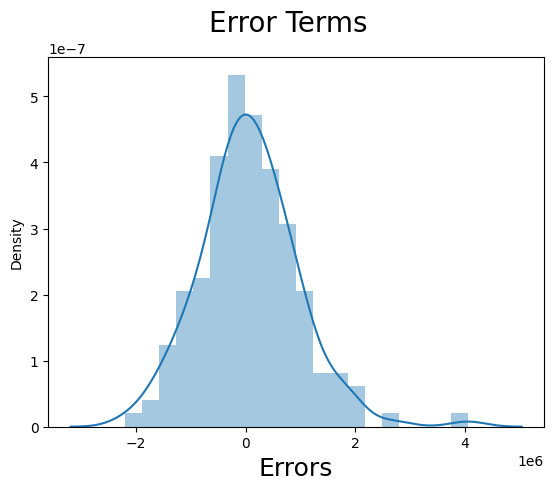

In [30]:
# Gráfica de la distribución de los términos de error
fig = plt.figure()
sns.distplot((y_test - y_pred), bins = 20)
plt.title('Términos de error')
plt.xlabel('Errors')   

In [31]:
# Evaluación del modelo
metrics.r2_score(y_test, y_pred)

0.726094110571665

Text(0, 0.5, 'y_pred')

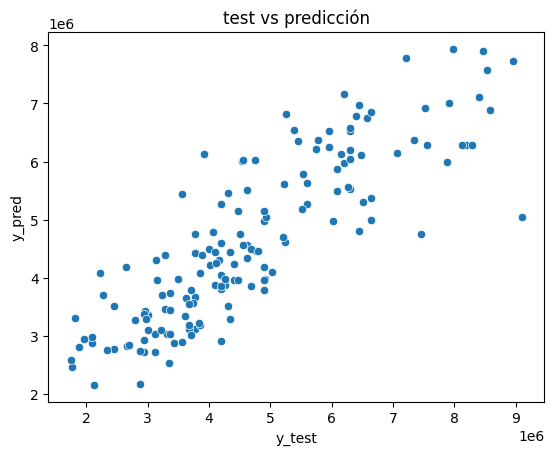

In [35]:
# Gráfica para observar el comportamiento de los datos
fig = plt.figure()
sns.scatterplot(x=y_test,y=y_pred)
plt.title('test vs predicción')
plt.xlabel('y_test')
plt.ylabel('y_pred')